In [1]:
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
train_data = pd.read_csv('data/annotations.csv')

In [49]:
train_data.head(5)

,Unnamed: 0,image_id,width,height,source,x,y,w,h
0,0,b6ab77fd7,1024,1024,usask_1,834.0,222.0,56.0,36.0
1,1,b6ab77fd7,1024,1024,usask_1,226.0,548.0,130.0,58.0
2,2,b6ab77fd7,1024,1024,usask_1,377.0,504.0,74.0,160.0
3,3,b6ab77fd7,1024,1024,usask_1,834.0,95.0,109.0,107.0
4,4,b6ab77fd7,1024,1024,usask_1,26.0,144.0,124.0,117.0


In [50]:
train_data['image_id'].value_counts()

35b935b6c    116
f1794c924    108
f79336a8e    104
134d4a01c    101
4cf91995d     97
            ... 
86296fc32      1
ce4124be0      1
4e6c05213      1
a5cb30c38      1
41457a646      1
Name: image_id, Length: 3373, dtype: int64

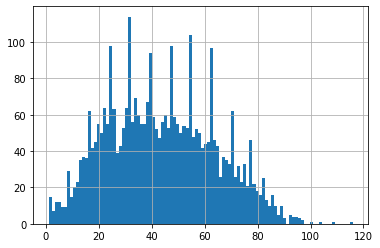

In [51]:
#number of boxes on image histogram
train_data['image_id'].value_counts().hist(bins=100)

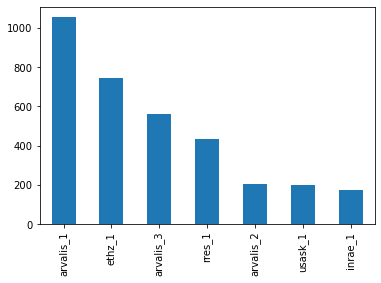

In [53]:
#source distribution
train_data.groupby('image_id')['source'].first().value_counts().plot(kind='bar')

In [70]:
!python utils/split_data.py --train_size=2200 --proportion=0.9

49 unlabeled images were found


In [71]:
train_ids = pd.read_csv('data/train.txt', header=None)

In [72]:
train_ids.columns= ["image_id"]
train_ids.head(5)

,image_id
0,adb1ef13e
1,6d1ff0f34
2,93648317d
3,8c05f24c4
4,a22cdd5eb


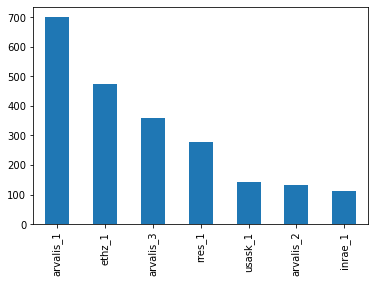

In [73]:
partial_train_data = pd.merge(train_data, train_ids, how='inner', on='image_id')
partial_train_data.groupby('image_id')['source'].first().value_counts().plot(kind='bar')